In [1]:
# Importing required libraries for data reading and understanding purpose
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating plots and visualizations
import seaborn as sns  # Library for creating statistical graphics

# Importing libraries for suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing train-test-split method from sklearn - model selection
from sklearn.model_selection import train_test_split

# Importing Standard Scaler method from sklearn - preprocessing library
from sklearn.preprocessing import StandardScaler

# Importing statmodels library for statistical summary and model creation
import statsmodels.api as sm

# Importing RFE and logistic regression libraries from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Importing necessary libraries for ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Importing VIFs library
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import confusion_matrix

# Checking accuracy for train dataset
from sklearn import metrics

In [2]:
# Reading the CSV file and storing it in a DataFrame called 'leads'
leads = pd.read_csv('Leads.csv')

# Displaying the first few rows of the DataFrame to get an overview of the data
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the shape of the dataset
leads.shape

(9240, 37)

In [4]:
# Displaying the information about the dataset, including column data types and total entries
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# checking all the statistical information of numerical variables
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Exploratory Data Analysis

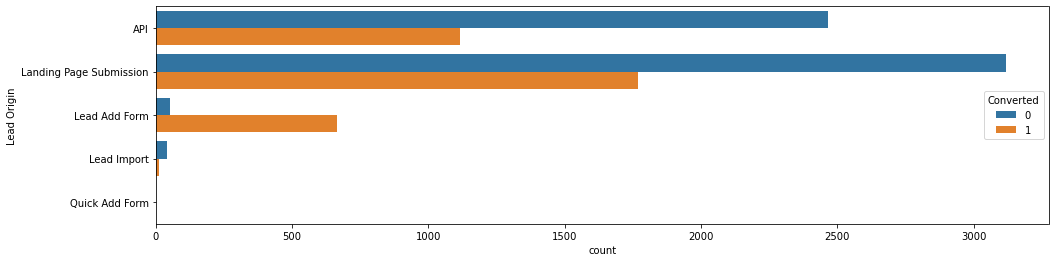

In [6]:
# Creating a countplot to understand the relationship between Lead Origin and Lead Conversion
# Set the figure size to 16 (width) and 4 (height) inches
plt.figure(figsize=(16, 4))

# Plotting the count of each Lead Origin category, differentiated by the Converted status
# The y-axis represents the Lead Origin categories
# The hue parameter colors the bars based on the Converted status (Converted or Not Converted)
# The data parameter specifies the DataFrame 'leads' to use for plotting
sns.countplot(y="Lead Origin", hue="Converted", data=leads)

# Displaying the plot
plt.show()


<AxesSubplot:xlabel='count', ylabel='Lead Source'>

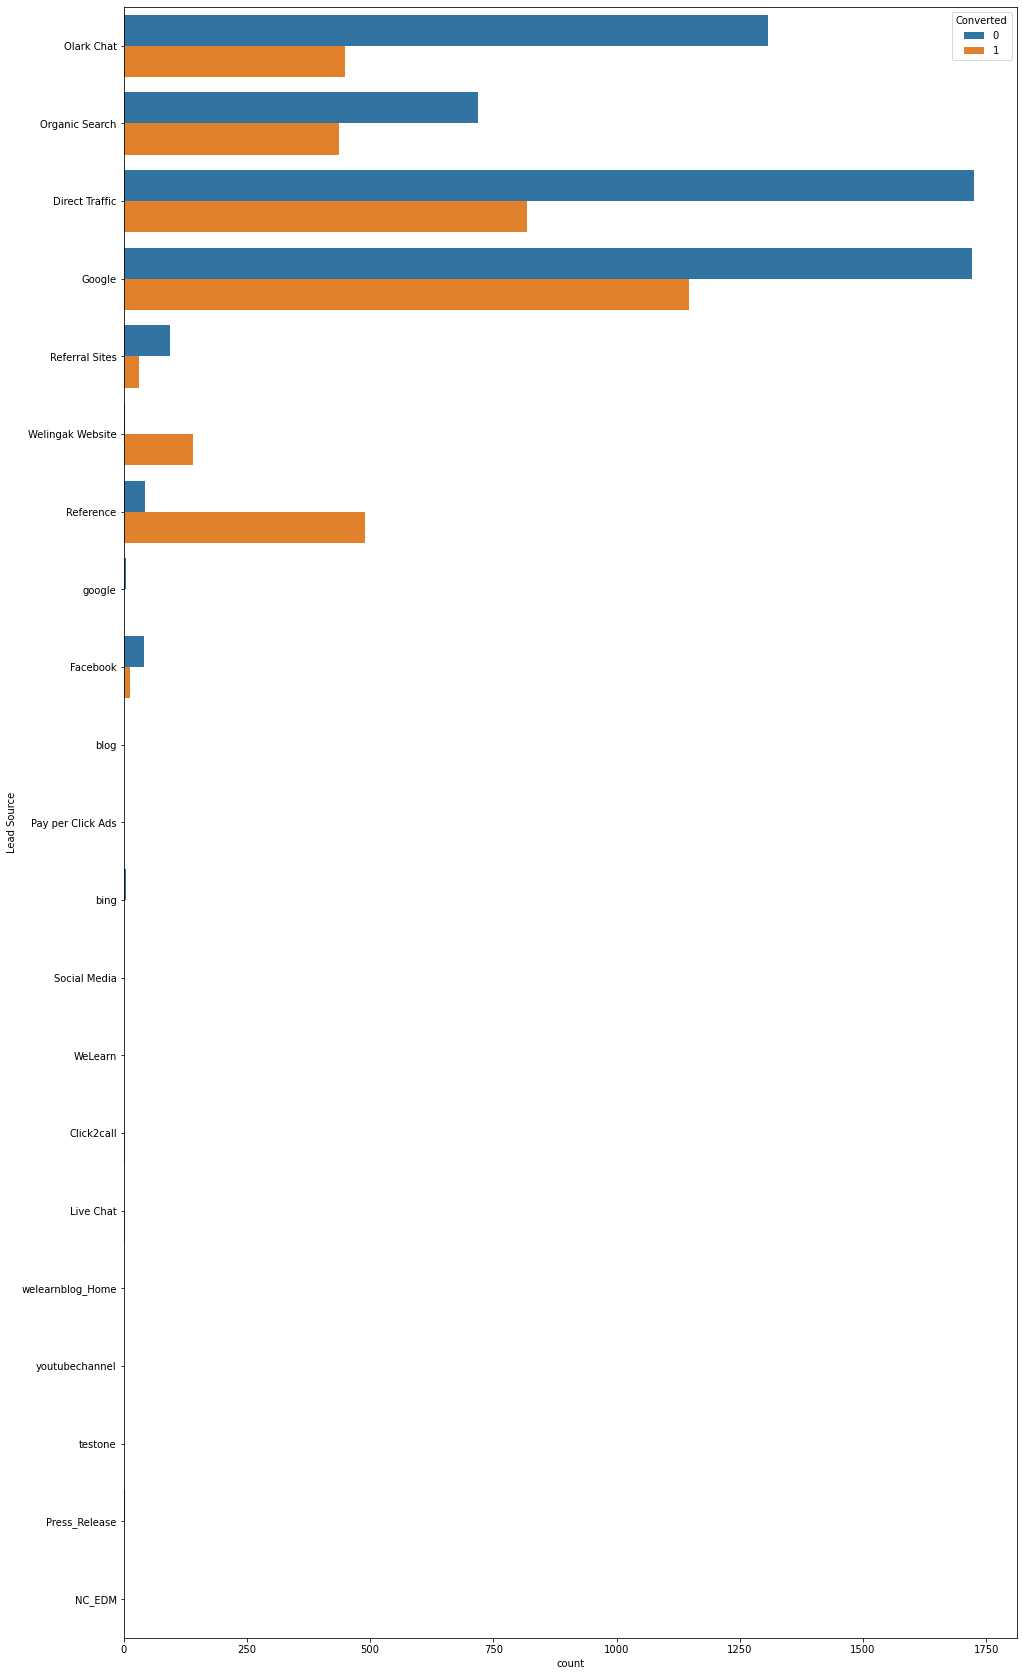

In [7]:
# Creating a countplot to understand the relationship between Lead Source and Lead Conversion
# Set the figure size to 16 (width) and 30 (height) inches to accommodate all the Lead Source categories
plt.figure(figsize=(16, 30))

# Plotting the count of each Lead Source category, differentiated by the Converted status
# The y-axis represents the Lead Source categories
# The hue parameter colors the bars based on the Converted status (Converted or Not Converted)
# The data parameter specifies the DataFrame 'leads' to use for plotting
sns.countplot(y="Lead Source", hue="Converted", data=leads)

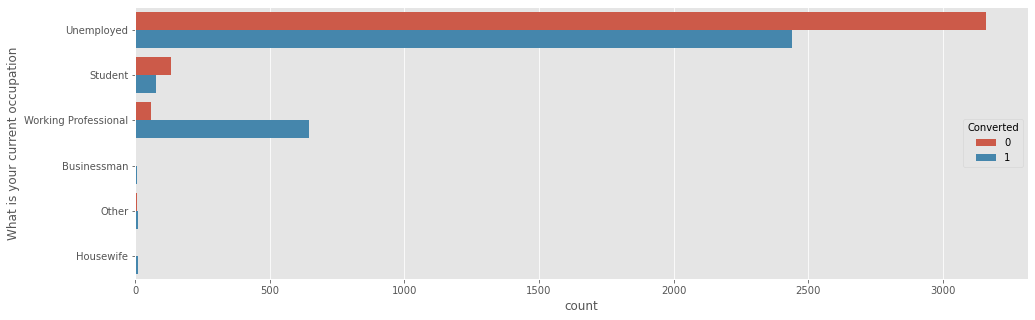

In [8]:
# Setting the plot style to 'ggplot' for a visually appealing plot
plt.style.use('ggplot')

# Creating a countplot to understand the relationship between Current Occupation and Lead Conversion
# Set the figure size to 16 (width) and 5 (height) inches
plt.figure(figsize=(16, 5))

# Plotting the count of each Current Occupation category, differentiated by the Converted status
# The y-axis represents the Current Occupation categories
# The hue parameter colors the bars based on the Converted status (Converted or Not Converted)
# The data parameter specifies the DataFrame 'leads' to use for plotting
sns.countplot(y="What is your current occupation", hue="Converted", data=leads)

# Displaying the plot
plt.show()


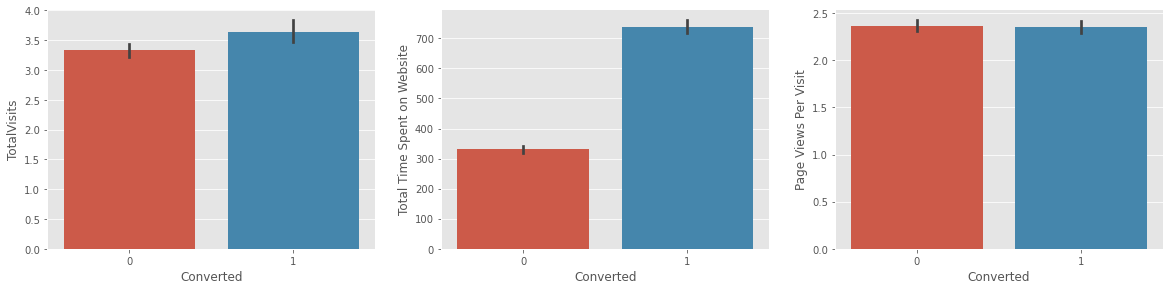

In [9]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
sns.barplot(x='Converted', y='TotalVisits', data=leads)
plt.xlabel('Converted')
plt.ylabel('TotalVisits')

plt.subplot(3, 3, 2)
sns.barplot(x='Converted', y='Total Time Spent on Website', data=leads)
plt.xlabel('Converted')
plt.ylabel('Total Time Spent on Website')

plt.subplot(3, 3, 3)
sns.barplot(x='Converted', y='Page Views Per Visit', data=leads)
plt.xlabel('Converted')
plt.ylabel('Page Views Per Visit')

plt.show()


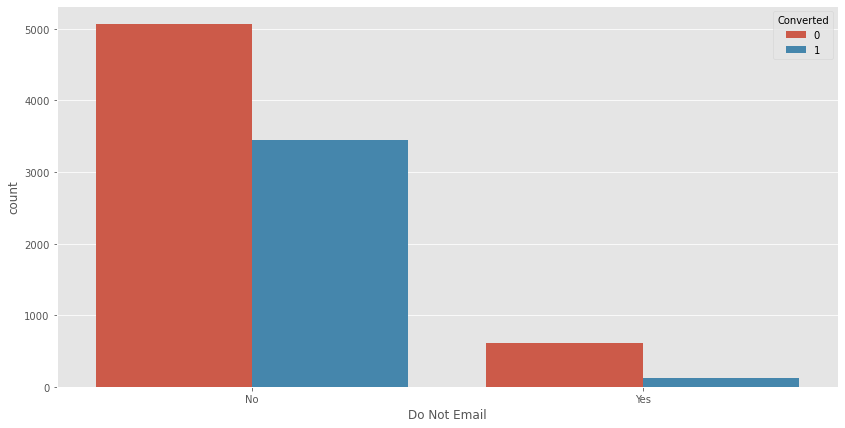

In [10]:
# Creating a countplot to understand the relationship between Do Not Email and Lead Conversion
# Set the figure size to 14 (width) and 7 (height) inches
plt.figure(figsize=(14, 7))

# Plotting the count of each Do Not Email category, differentiated by the Converted status
# The x-axis represents the Do Not Email categories
# The hue parameter colors the bars based on the Converted status (Converted or Not Converted)
# The data parameter specifies the DataFrame 'leads' to use for plotting
sns.countplot(x="Do Not Email", hue="Converted", data=leads)

# Displaying the plot
plt.show()


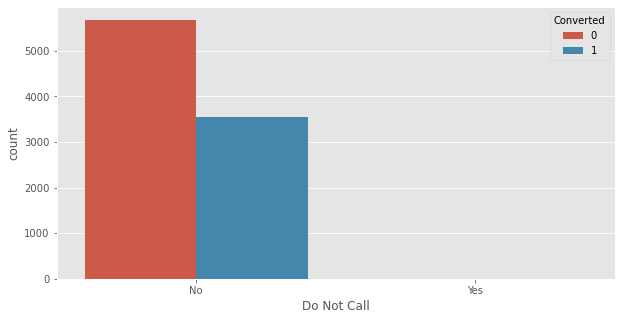

In [11]:
# Creating a countplot to understand the relationship between Do Not Call and Lead Conversion
# Set the figure size to 10 (width) and 5 (height) inches
plt.figure(figsize=(10, 5))

# Plotting the count of each Do Not Call category, differentiated by the Converted status
# The x-axis represents the Do Not Call categories
# The hue parameter colors the bars based on the Converted status (Converted or Not Converted)
# The data parameter specifies the DataFrame 'leads' to use for plotting
sns.countplot(x="Do Not Call", hue="Converted", data=leads)

# Displaying the plot
plt.show()

In [12]:
# Looping over each column in the DataFrame and printing the value counts
for i in leads.columns:
    print(leads[i].value_counts())

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [13]:
# Dropping redundant columns based on the insights gained
leads = leads.drop(['Prospect ID', 'Lead Number', 'Country', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque', 'Magazine'], axis=1)

In [14]:
leads.shape

(9240, 28)

In [15]:
# Creating an empty list to store the column names that have 'Select' option
have_select = []

# Looping over each column in the DataFrame
for i in leads.columns:
    # Checking if the column contains the value 'Select' and has more than one unique value
    if len(leads[i].isin(['Select']).unique()) > 1:
        # If the condition is satisfied, appending the column name to the 'have_select' list
        have_select.append(i)
        
# Displaying the columns that have 'Select' option
have_select

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [16]:
# Replacing 'Select' category with null values (NaN) in columns identified earlier
for i in have_select:
    leads[i] = leads[i].replace('Select', np.NaN)

# Displaying the first few rows of the modified DataFrame
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Through Recommendations,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Interested in other courses,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,No,Ringing,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,Ringing,Not Sure,NaN,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,No,Will revert after reading the email,Might be,NaN,02.Medium,01.High,15.0,18.0,No,Modified


In [17]:
# Calculating the percentage of missing values in each column
missing_percentage = leads.isnull().mean() * 100

# Rounding the missing percentage values to two decimal places
missing_percentage = missing_percentage.round(2)

# Displaying the missing percentage for each column
missing_percentage

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [18]:
# Setting the threshold for the percentage of missing values
threshold = 40

# Dropping columns with missing values exceeding the threshold
leads = leads.dropna(thresh=len(leads) - (threshold / 100 * len(leads)), axis=1)

# Displaying the first few rows of the modified DataFrame
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [19]:
#checking shape of data set after removing columns
leads.shape

(9240, 21)

In [20]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [21]:
# Creating a list of column names where the missing values are below or equal to 40%
below_40 = list(leads.columns[(leads.isnull().sum() > 0) & (leads.isnull().mean() <= 0.4)])

# Displaying the list of column names
below_40

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags']

In [22]:
# Printing the value counts of the 'Lead Source' column
print(leads['Lead Source'].value_counts())

# Printing the count of missing values in the 'Lead Source' column
print('Missing values count:', leads['Lead Source'].isnull().sum())

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
Missing values count: 36


In [23]:
# Replacing specific values in the 'Lead Source' column with 'Other'
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat', 'Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog', 'Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM', 'Welingak Website', 'Referral Sites'], 'Other')

# Replacing 'google' with 'Google' in the 'Lead Source' column
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

# Printing the updated value counts of the 'Lead Source' column
leads['Lead Source'].value_counts()

# Printing the count of missing values in the 'Lead Source' column
print('Missing values count:', leads['Lead Source'].isnull().sum())

Missing values count: 36


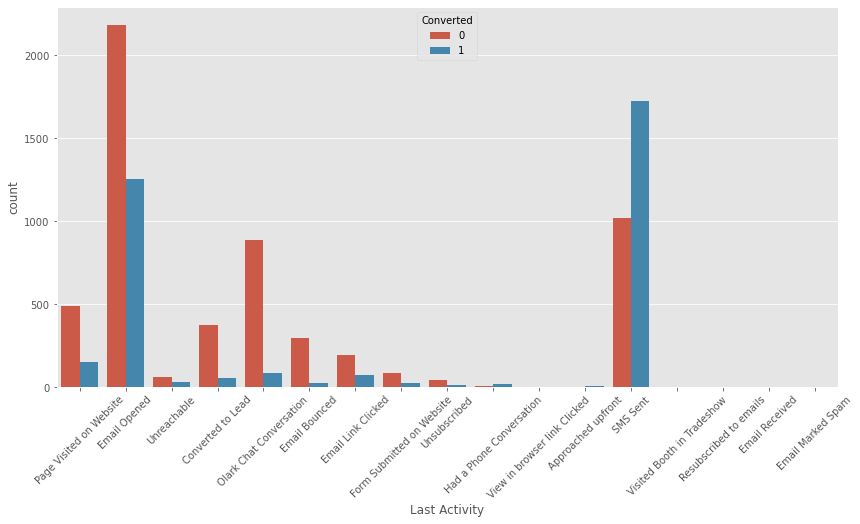

In [24]:
# Ploting a bar graph for Last Activity and Convereted column 
plt.figure(figsize=(14, 7))
# Using Seaborn
sns.countplot(x="Last Activity",hue = 'Converted', data=leads)
plt.xticks(rotation=45)
plt.show()

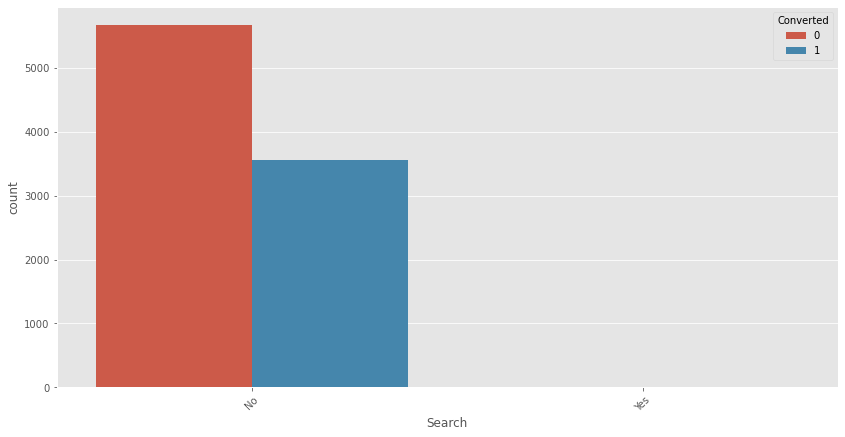

In [25]:
# PLotting a bar graph for Lead Source and count 
plt.figure(figsize=(14, 7))

sns.countplot(x="Search", hue = 'Converted', data=leads)
plt.xticks(rotation=45)
plt.show()


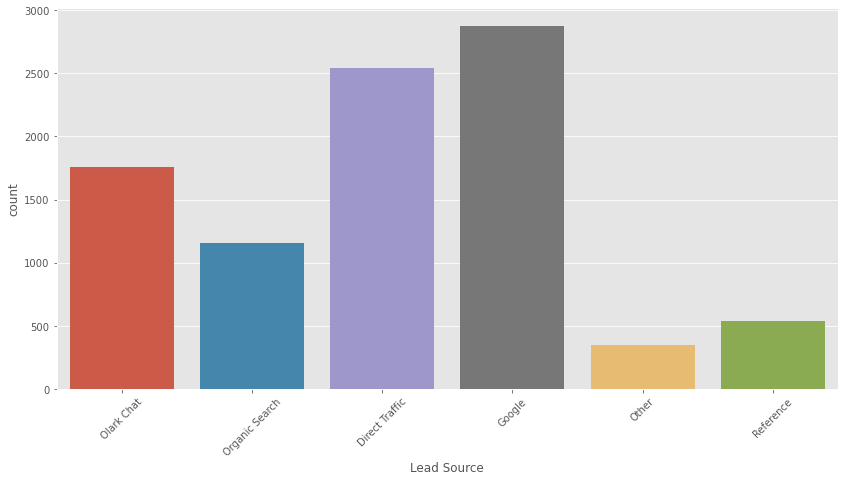

In [26]:
# PLotting a bar graph for Lead Source and count 
plt.figure(figsize=(14, 7))

sns.countplot(x="Lead Source", data=leads)
plt.xticks(rotation=45)
plt.show()


In [27]:
# Imputing missing values in the 'Lead Source' column with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace(np.NaN, 'Google')

# Printing the updated value counts of the 'Lead Source' column
print(leads['Lead Source'].value_counts())

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64


In [28]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [29]:
# # PLotting a bar graph for Lead Source and count 
# sns.countplot(x='Total Time Spent on Website',hue = 'Converted', data= leads)
# sns.countplot(x='Total Visits',hue = 'Converted', data= leads)
# plt.show()

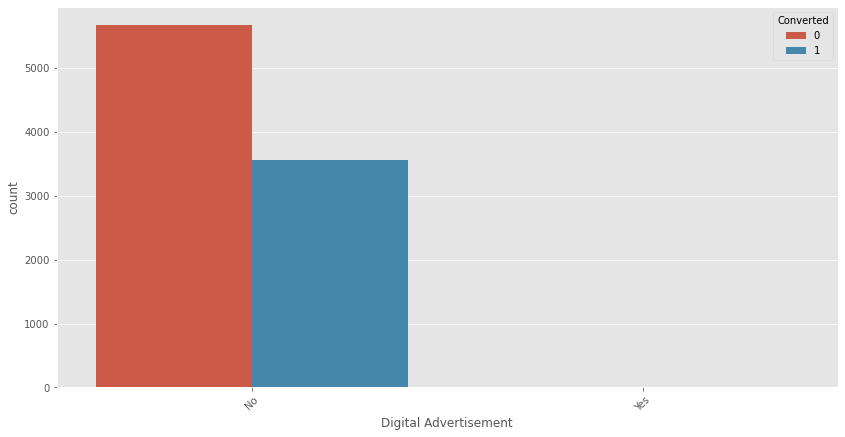

In [30]:
# PLotting a bar graph for Lead Source and count 
plt.figure(figsize=(14, 7))

sns.countplot(x="Digital Advertisement",hue = 'Converted', data= leads)
plt.xticks(rotation=45)
plt.show()

In [31]:
# Calculating the value counts of the 'Specialization' column
value_counts = leads['Specialization'].value_counts()

# Calculating the count of missing values in the 'Specialization' column
missing_value_counts = leads['Specialization'].isnull().sum()

# Printing the value counts of the 'Specialization' column
print(value_counts)

# Printing the count of missing values in the 'Specialization' column
print('Missing values count:', missing_value_counts)

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
Missing values count: 3380


In [32]:
# Replacing missing values in the 'Specialization' column with 'Missing'
leads['Specialization'] = leads['Specialization'].replace(np.NaN, 'Missing')

# Printing the updated value counts of the 'Specialization' column
print(leads['Specialization'].value_counts())

Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In [33]:
# Calculating the value counts of the 'What is your current occupation' column
value_counts = leads['What is your current occupation'].value_counts()

# Calculating the count of missing values in the 'What is your current occupation' column
missing_value_counts = leads['What is your current occupation'].isnull().sum()

# Printing the value counts of the 'What is your current occupation' column
print(value_counts)

# Printing the count of missing values in the 'What is your current occupation' column
print('Missing values count:', missing_value_counts)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
Missing values count: 2690


In [34]:
# Replacing missing values in the 'What is your current occupation' column with 'Missing'
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN, 'Missing')

# Printing the updated value counts of the 'What is your current occupation' column
print(leads['What is your current occupation'].value_counts())

Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [35]:
# Calculating the value counts of the 'What matters most to you in choosing a course' column
value_counts = leads['What matters most to you in choosing a course'].value_counts()

# Calculating the count of missing values in the 'What matters most to you in choosing a course' column
missing_value_counts = leads['What matters most to you in choosing a course'].isna().sum()

# Printing the value counts of the 'What matters most to you in choosing a course' column
print(value_counts)

# Printing the count of missing values in the 'What matters most to you in choosing a course' column
print('Missing values count:', missing_value_counts)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
Missing values count: 2709


In [36]:
leads = leads.drop('What matters most to you in choosing a course', axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Missing,Unemployed,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [37]:
miss_max = ['TotalVisits','Page Views Per Visit','Last Activity','Tags'] # assigning them in a list

for i in leads[miss_max].columns:
    print(leads[i].value_counts())
    print('Missing values count --->', leads[i].isna().sum())

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64
Missing values count ---> 137
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64
Missing values count ---> 137
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website   

In [38]:
# Iterating over columns with missing values
for i in leads[miss_max].columns:
    # Finding the label with the maximum occurrences
    max_str = leads[i].value_counts()[leads[i].value_counts() == leads[i].value_counts().max()].index[0]
    
    # Filling missing values with the maximum occurring label
    leads[i] = leads[i].fillna(value=max_str)
    
    # Printing the updated value counts and count of missing values
    print(leads[i].value_counts())
    print('Missing values count --->', leads[i].isna().sum())

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64
Missing values count ---> 0
0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64
Missing values count ---> 0
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website       

In [39]:
# Finding the label with the maximum occurrences in each column
max_labels = leads[miss_max].apply(lambda x: x.value_counts().idxmax())

# Filling missing values in the columns with their respective maximum occurring labels
leads[miss_max] = leads[miss_max].fillna(value=max_labels)

In [40]:
# Calculating the percentage of missing values in each row
missing_row_count = leads.apply(lambda x: round(100 * (sum(x.isnull().values) / len(leads.index)), 2), axis=1)

# Filtering rows where the percentage of missing values is greater than 40%
rows_with_missing_values = missing_row_count[missing_row_count > 40]

# Printing the rows with missing values more than 40%
print(rows_with_missing_values)

Series([], dtype: float64)


In [41]:
#checking data set information to check the columns yes/no labels
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [42]:
# List of column names for which the values are either "Yes" or "No"
yes_no = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
          'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Dictionary mapping "No" to 0 and "Yes" to 1
category = {"No": 0, "Yes": 1}

# Replacing values in the columns specified by 'yes_no' with the corresponding values from the 'category' dictionary
leads[yes_no] = leads[yes_no].replace(category)

# Printing the updated DataFrame
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


**Checking for Outliers**

In [43]:
# checking the statistical data
leads.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554
std,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


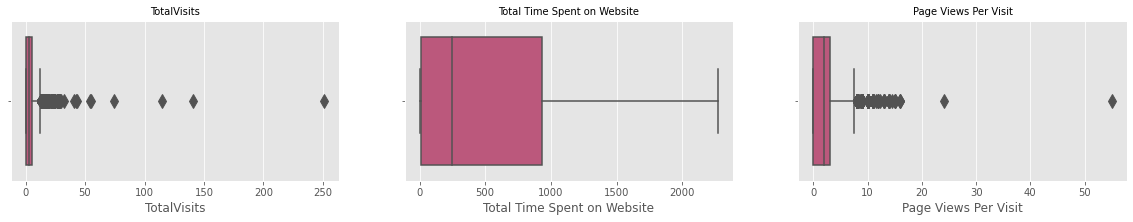

In [44]:
# Setting the figure size
plt.figure(figsize=(20, 10))

# Title names for the columns in the dataset
col_titles = {0: 'TotalVisits', 1: 'Total Time Spent on Website', 2: 'Page Views Per Visit'}

# Visualizing the outliers with boxplots for all the variables
for i, col_index in enumerate(col_titles):
    plt.subplot(3, 3, i + 1)
    plt.title(col_titles[col_index], fontsize=10)
    sns.boxplot(x=leads[col_titles[col_index]], data=leads, palette='plasma', fliersize=10)

In [45]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
# Creating labels for TotalVisits buckets
TotalVisits_labels = ['TotalVisits_0', 'TotalVisits_1_2', 'TotalVisits_3_4', 'TotalVisits_5_6', 'TotalVisits_7_8',
                      'TotalVisits_9_10', 'TotalVisits_11_12', 'TotalVisits_12_15', 'TotalVisits_above_15']

# Creating bins for TotalVisits_labels
leads['TotalVisits'] = pd.cut(leads['TotalVisits'], bins=[-1, 0.0, 2, 4, 6, 8, 10, 12, 15, 251], labels=TotalVisits_labels)

In [47]:
leads['TotalVisits'].value_counts()

TotalVisits_3_4         2426
TotalVisits_0           2326
TotalVisits_1_2         2075
TotalVisits_5_6         1249
TotalVisits_7_8          533
TotalVisits_9_10         278
TotalVisits_11_12        131
TotalVisits_above_15     120
TotalVisits_12_15        102
Name: TotalVisits, dtype: int64

In [48]:
# Creating labels for Page Views Per Visit buckets
pvpv_labels = ['Page_Views_Per_Visit_0', 'Page_Views_Per_Visit_1_2', 'Page_Views_Per_Visit_3_4',
               'Page_Views_Per_Visit_5_6', 'Page_Views_Per_Visit_7_8', 'Page_Views_Per_Visit_9_10',
               'Page_Views_Per_Visit_above_10']

# Creating bins for 'Page Views Per Visit'
leads['Page Views Per Visit'] = pd.cut(leads['Page Views Per Visit'], bins=[-1, 0, 2, 4, 6, 8, 10, 60], labels=pvpv_labels)

In [49]:
leads['Page Views Per Visit'].value_counts()

Page_Views_Per_Visit_1_2         3007
Page_Views_Per_Visit_3_4         2696
Page_Views_Per_Visit_0           2326
Page_Views_Per_Visit_5_6          851
Page_Views_Per_Visit_7_8          237
Page_Views_Per_Visit_9_10          73
Page_Views_Per_Visit_above_10      50
Name: Page Views Per Visit, dtype: int64

In [50]:
# checking data set after creating bins
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,TotalVisits_0,0,Page_Views_Per_Visit_0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,TotalVisits_5_6,674,Page_Views_Per_Visit_3_4,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_1_2,1532,Page_Views_Per_Visit_1_2,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_1_2,305,Page_Views_Per_Visit_1_2,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,TotalVisits_1_2,1428,Page_Views_Per_Visit_1_2,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


In [51]:
# dropping redundant column

redundant=['Last Activity', 'Tags', 'Last Notable Activity']
leads=leads.drop(redundant,axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,TotalVisits_0,0,Page_Views_Per_Visit_0,Missing,Unemployed,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,TotalVisits_5_6,674,Page_Views_Per_Visit_3_4,Missing,Unemployed,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_1_2,1532,Page_Views_Per_Visit_1_2,Business Administration,Student,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_1_2,305,Page_Views_Per_Visit_1_2,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,TotalVisits_1_2,1428,Page_Views_Per_Visit_1_2,Missing,Unemployed,0,0,0,0,0,0,0


In [52]:
leads.shape

(9240, 17)

In [53]:
# List of categorical variables to encode
cat = ['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'TotalVisits', 'Page Views Per Visit']

# Perform one-hot encoding using pd.get_dummies
dummy = pd.get_dummies(leads[cat], drop_first=True)

# Add the generated dummy variables to the original dataset
leads = pd.concat([leads, dummy], axis=1)

# Drop the original categorical columns from the dataset
leads = leads.drop(cat, axis=1)

# View the updated dataset
leads.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
#checking statistical data
leads.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,487.698268,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,...,0.030087,0.014177,0.011039,0.012987,0.325433,0.291775,0.092100,0.025649,0.007900,0.005411
std,0.270435,0.014711,0.486714,548.021466,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,...,0.170835,0.118229,0.104491,0.113224,0.468562,0.454604,0.289182,0.158095,0.088537,0.073366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,248.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,936.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
#checking shape of the data set
leads.shape

(9240, 58)

# Model Train 

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Assigning the target variable 'Converted' to 'y'
y = leads['Converted']

# Assigning the feature variables (excluding 'Converted') to 'X'
X = leads.drop('Converted', 1)

# Checking the head of the target variable 'y'
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,305,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1428,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [59]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [60]:
#looking all the X, y train and test sets
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6468, 57)
X_test: (2772, 57)
y_train: (6468,)
y_test: (2772,)


#### Feature Standardization

In [61]:
scaler=StandardScaler()  # Creating an object

In [62]:
# Scaling the 'Total Time Spent on Website' variable using StandardScaler
X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

# Checking the descriptive statistics of the scaled training set
X_train.describe()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
count,6468.000000,6468.000000,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000309,-1.609377e-16,0.001701,0.000309,0.000155,0.000155,0.000464,0.001082,0.311843,...,0.029994,0.013451,0.011905,0.014069,0.329777,0.290507,0.089827,0.024583,0.008658,0.005102
std,0.268799,0.017583,1.000077e+00,0.041207,0.017583,0.012434,0.012434,0.021533,0.032882,0.463282,...,0.170583,0.115204,0.108466,0.117786,0.470169,0.454031,0.285956,0.154861,0.092652,0.071252
min,0.000000,0.000000,-8.853708e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-8.634138e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-4.352528e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,8.098906e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,3.271816e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# Calculating and printing the current conversion rate
print('Current Conversion Rate:', round((sum(y) / len(y.index)) * 100, 2))

Current Conversion Rate: 38.54


## Correlation in the dataset

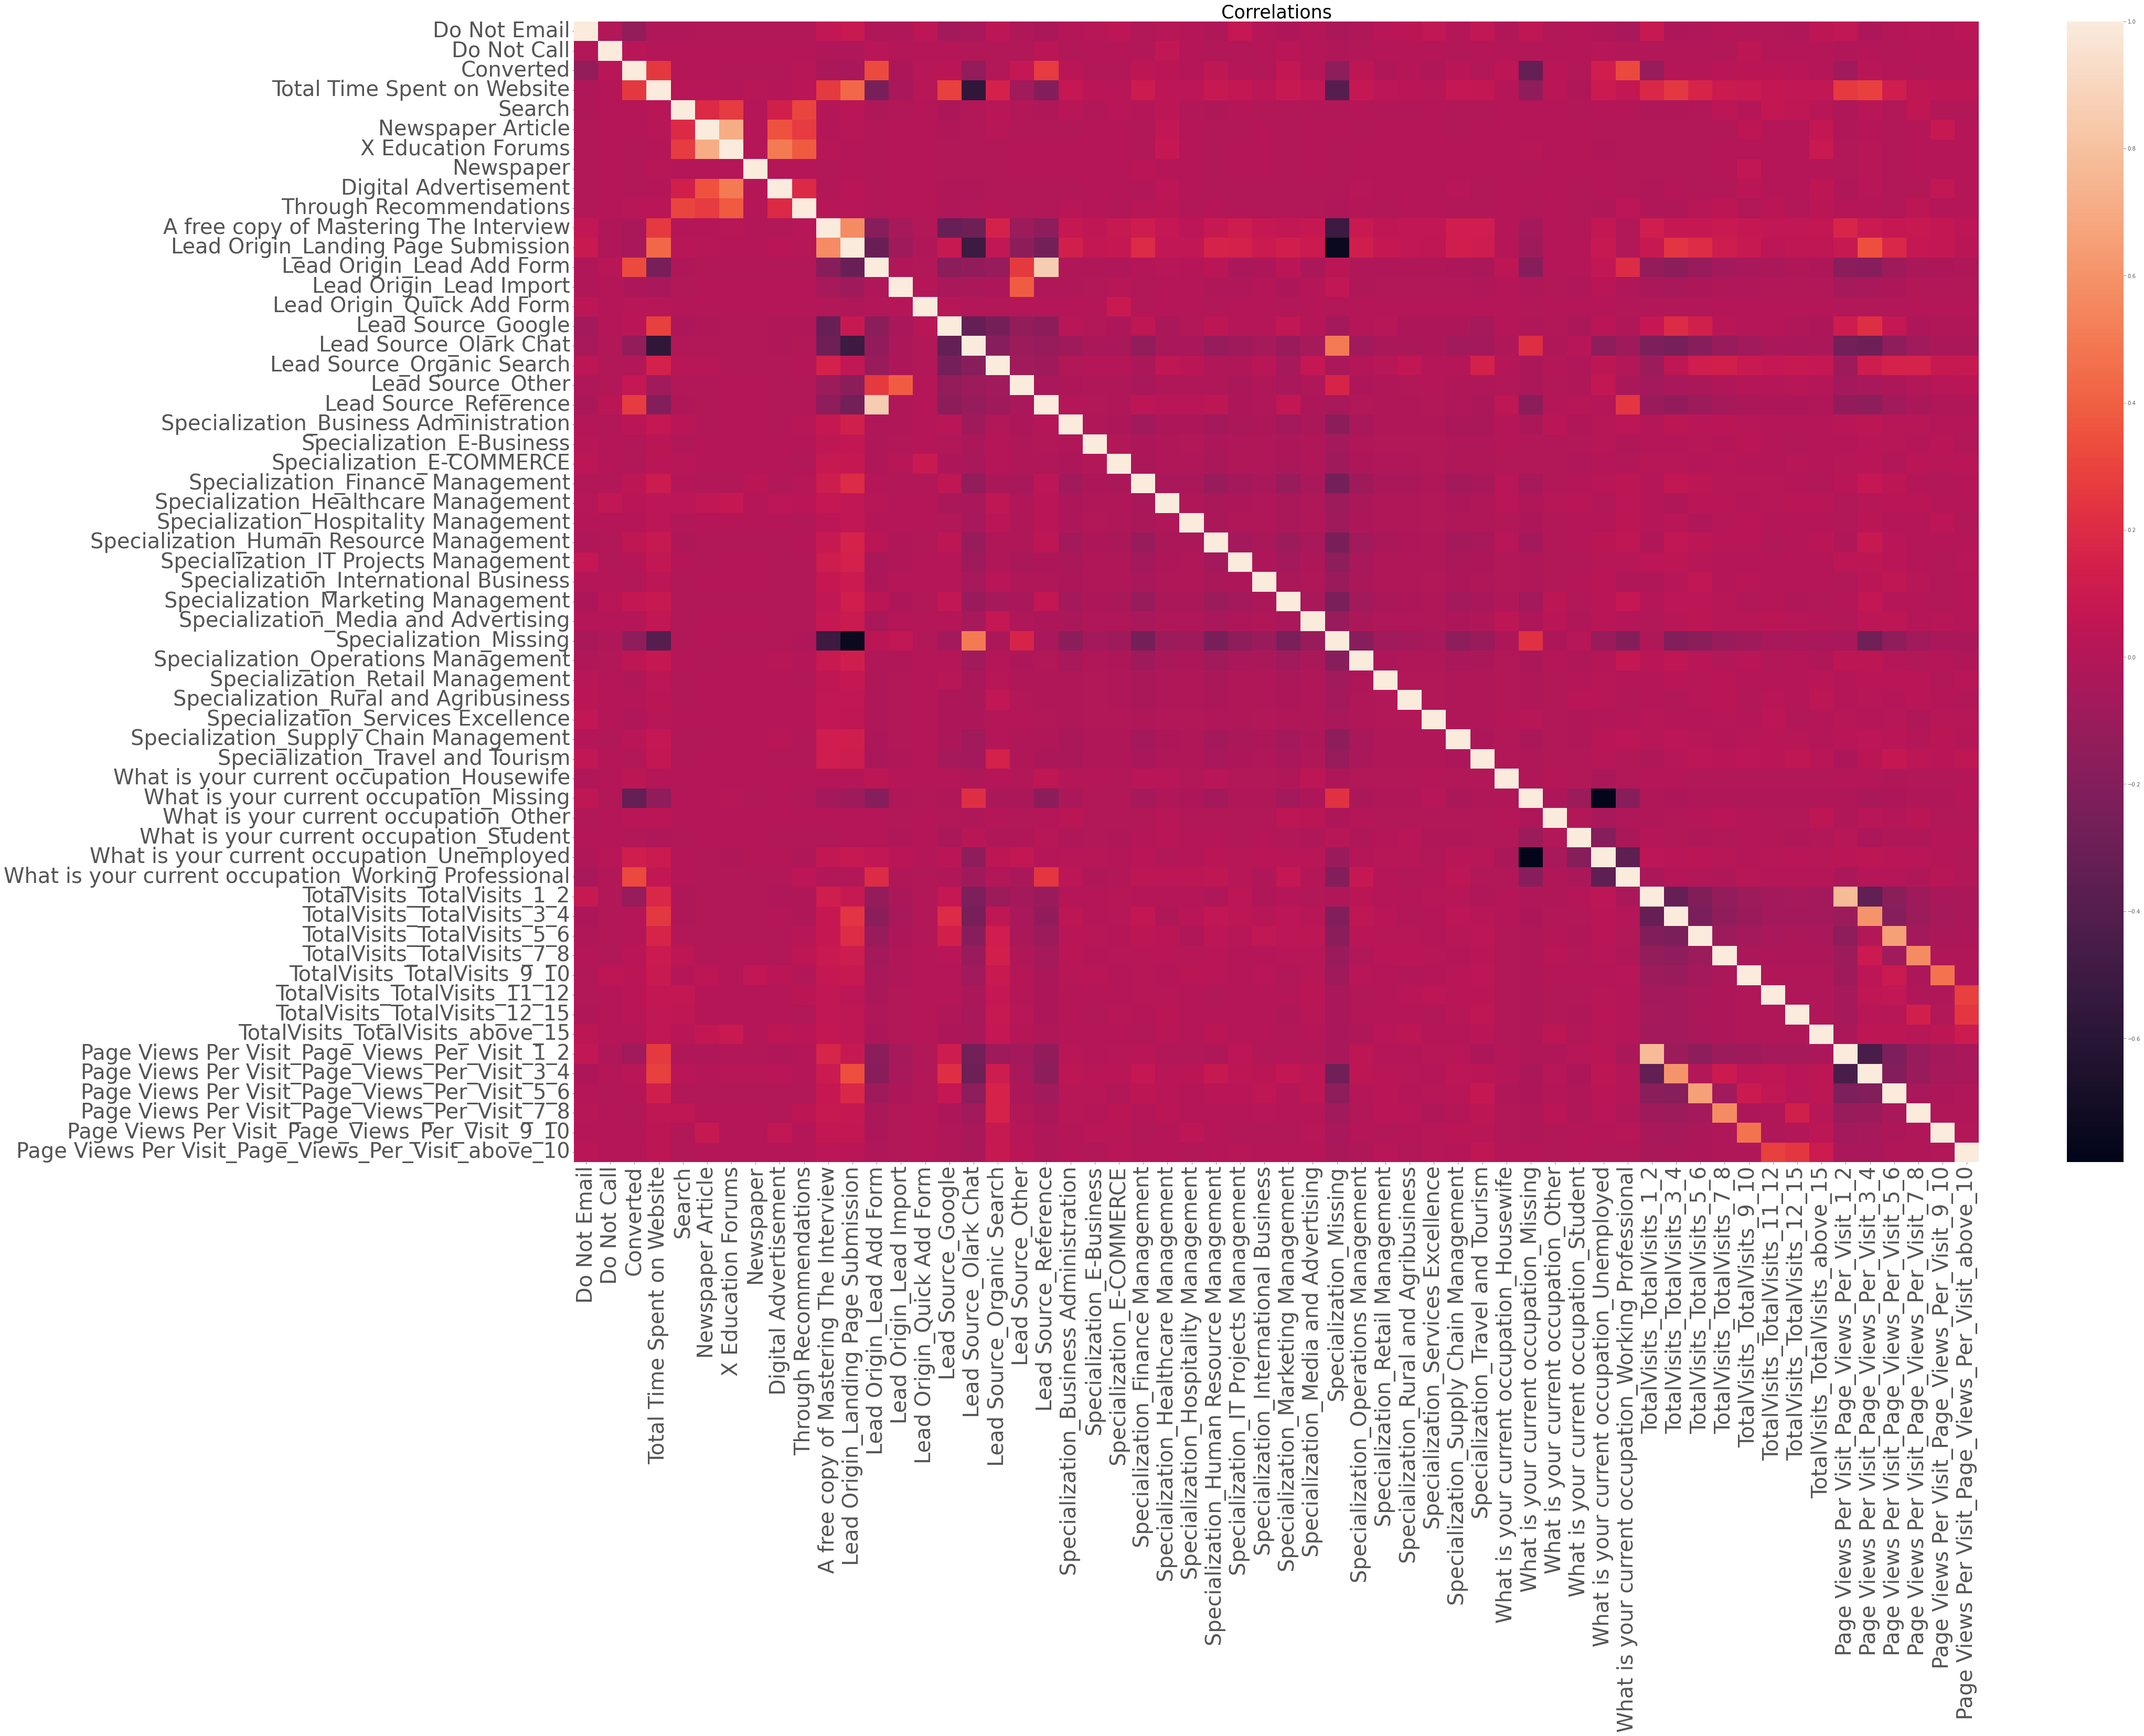

In [64]:
# Setting the figure size
plt.figure(figsize=(60, 40))

# Plotting a heatmap of the correlation matrix
sns.heatmap(leads.corr(method='spearman'))

# Setting the title and font sizes
plt.title('Correlations', fontsize=35)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

# Displaying the heatmap
plt.show()

# 5. Building a Model

### Feature selection using RFE 

In [65]:
# creating an object

logreg = LogisticRegression()                

In [66]:
# RFE model with 15 variables

rfe = RFE(estimator=logreg, n_features_to_select=15)

# fitting the model

rfe = rfe.fit(X_train,y_train)   

In [67]:
# Create an instance of the Logistic Regression model
logreg = LogisticRegression()

# Create an instance of the RFE class and specify the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE model to your training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_


In [68]:
#listing which all columns are selected(True) by RFE and which all are rejected(False)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 42),
 ('Newspaper Article', False, 11),
 ('X Education Forums', False, 20),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 8),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 43),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Other', False, 36),
 ('Lead Source_Reference', False, 3),
 ('Specialization_Business Administration', False, 21),
 ('Specialization_E-Business', False, 31),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_Finance Management', False, 40),
 ('Specialization_Healthcare Management', False, 37),
 ('Specialization_Hospitality

In [69]:
# storing selected(True) columns by RFE in a list
rfe_col = X_train.columns[rfe.support_]

# listing features removed by RFE feature selection
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Reference', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       '

In [70]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Hospitality Management,Specialization_Missing,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Working Professional,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10
1871,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.005716,1,0,0,0,1,0,0,0,1,0,0,0,0
3516,0,-0.691418,0,0,0,0,1,0,0,0,0,1,0,0,0
8105,0,1.365219,1,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,-0.885371,0,0,0,0,1,0,0,0,0,0,0,0,0


**Model 1**

In [71]:
# Adding a constant to the features matrix
X_train_1 = sm.add_constant(X_train_rfe)

# Creating a GLM model and fitting it to the training data
logr1 = sm.GLM(y_train, X_train_1, family=sm.families.Binomial()).fit()

# Displaying the summary of the model
logr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.5
Date:                Sun, 04 Jun 2023   Deviance:                       5699.1
Time:                        15:18:02   Pearson chi2:                 9.01e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3612
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1330      0.136      8.345      0.000       0.867       1.399
Do Not Email                                            -1.2865      0.160     -8.055      0.000      -1.600      -0.973
Total Time Spent on Website                              1.1141      0.039     28.510      0.000       1.037       1.191
Lead Origin_Landing Page Submission                     -0.9087      0.119     -7.607      0.000      -1.143      -0.675
Lead Origin_Lead Add Form                                2.5615      0.188     13.607      0.000       2.193       2.930
Lead Origin_Lead Import                                 -1.5579      0.538     -2.897      0.004      -2.612      -0.504
Specialization_Hospitality Management                   -1.0284      0.327     -3.141      0.002      -1.670      -0.387
Specialization_Missing                                  -0.9752      0.119     -8.164      0.000      -1.209      -0.741
What is your current occupation_Housewife               22.3639   1.32e+04      0.002      0.999   -2.58e+04    2.58e+04
What is your current occupation_Missing                 -1.1869      0.083    -14.245      0.000      -1.350      -1.024
What is your current occupation_Working Professional     2.4044      0.185     12.982      0.000       2.041       2.767
Page Views Per Visit_Page_Views_Per_Visit_1_2           -1.1833      0.118    -10.005      0.000      -1.415      -0.952
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.9541      0.127     -7.531      0.000      -1.202      -0.706
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.8874      0.154     -5.766      0.000      -1.189      -0.586
Page Views Per Visit_Page_Views_Per_Visit_7_8           -0.8564      0.234     -3.655      0.000      -1.316      -0.397
Page Views Per Visit_Page_Views_Per_Visit_9_10          -1.0598      0.373     -2.842      0.004      -1.791      -0.329
========================================================================================================================
"""

#### Calculating VIF

In [72]:
# Creating an empty DataFrame
vif = pd.DataFrame()

# Adding the features from X_train_rfe as the 'Features' column in the DataFrame
vif['Features'] = X_train_rfe[rfe_col].columns

# Calculating the VIFs for each feature
vif['VIF'] = [variance_inflation_factor(X_train_rfe[rfe_col].values, i) for i in range(X_train_rfe[rfe_col].shape[1])]

# Rounding the VIF values to two decimal places
vif['VIF'] = round(vif['VIF'], 2)

# Sorting the DataFrame by descending VIF values
vif = vif.sort_values(by='VIF', ascending=False)

# Displaying the DataFrame
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.87
11,Page Views Per Visit_Page_Views_Per_Visit_3_4,3.06
10,Page Views Per Visit_Page_Views_Per_Visit_1_2,2.77
6,Specialization_Missing,2.07
12,Page Views Per Visit_Page_Views_Per_Visit_5_6,1.65
8,What is your current occupation_Missing,1.56
1,Total Time Spent on Website,1.26
13,Page Views Per Visit_Page_Views_Per_Visit_7_8,1.17
3,Lead Origin_Lead Add Form,1.16
9,What is your current occupation_Working Profes...,1.15


**Model 2**

- for this we are dropping 'const','What is your current occupation_Housewife' due to high p-value

In [73]:
# Dropping the columns 'const' and 'What is your current occupation_Housewife' from X_train_1
X_train_rfe2 = X_train_1.drop(['const', 'What is your current occupation_Housewife'], 1)

# Adding a constant to the new dataset X_train_rfe2
X_train_2 = sm.add_constant(X_train_rfe2)

# Creating a new model (logr2) using GLM with the modified dataset
logr2 = sm.GLM(y_train, X_train_2, family=sm.families.Binomial()).fit()

# Displaying the summary of the new model
logr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.5
Date:                Sun, 04 Jun 2023   Deviance:                       5709.0
Time:                        15:18:03   Pearson chi2:                 9.03e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3603
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1352      0.136      8.362      0.000       0.869       1.401
Do Not Email                                            -1.2910      0.160     -8.083      0.000      -1.604      -0.978
Total Time Spent on Website                              1.1129      0.039     28.509      0.000       1.036       1.189
Lead Origin_Landing Page Submission                     -0.9055      0.119     -7.585      0.000      -1.139      -0.672
Lead Origin_Lead Add Form                                2.5701      0.188     13.665      0.000       2.201       2.939
Lead Origin_Lead Import                                 -1.5575      0.538     -2.897      0.004      -2.611      -0.504
Specialization_Hospitality Management                   -1.0328      0.327     -3.155      0.002      -1.674      -0.391
Specialization_Missing                                  -0.9786      0.119     -8.196      0.000      -1.213      -0.745
What is your current occupation_Missing                 -1.1897      0.083    -14.283      0.000      -1.353      -1.026
What is your current occupation_Working Professional     2.3987      0.185     12.953      0.000       2.036       2.762
Page Views Per Visit_Page_Views_Per_Visit_1_2           -1.1797      0.118     -9.984      0.000      -1.411      -0.948
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.9525      0.127     -7.523      0.000      -1.201      -0.704
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.8905      0.154     -5.787      0.000      -1.192      -0.589
Page Views Per Visit_Page_Views_Per_Visit_7_8           -0.8599      0.234     -3.671      0.000      -1.319      -0.401
Page Views Per Visit_Page_Views_Per_Visit_9_10          -1.0632      0.373     -2.852      0.004      -1.794      -0.332
========================================================================================================================
"""

In [74]:
# Create a dataframe to store the feature names and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.87
10,Page Views Per Visit_Page_Views_Per_Visit_3_4,3.06
9,Page Views Per Visit_Page_Views_Per_Visit_1_2,2.77
6,Specialization_Missing,2.07
11,Page Views Per Visit_Page_Views_Per_Visit_5_6,1.65
7,What is your current occupation_Missing,1.56
1,Total Time Spent on Website,1.26
12,Page Views Per Visit_Page_Views_Per_Visit_7_8,1.17
3,Lead Origin_Lead Add Form,1.16
8,What is your current occupation_Working Profes...,1.15


**Model 3**

- for this we are dropping 'const','Specialization_Missing' as this is has no information.

In [75]:
# Drop 'Specialization_Missing' and constant from X_train_2
X_train_rfe3 = X_train_2.drop(['const', 'Specialization_Missing'], 1)

# Create a new model 3
X_train_3 = sm.add_constant(X_train_rfe3)
logr3 = sm.GLM(y_train, X_train_3, family=sm.families.Binomial()).fit()
logr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2889.1
Date:                Sun, 04 Jun 2023   Deviance:                       5778.2
Time:                        15:18:03   Pearson chi2:                 7.92e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3534
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3026      0.087      3.468      0.001       0.132       0.474
Do Not Email                                            -1.3137      0.160     -8.229      0.000      -1.627      -1.001
Total Time Spent on Website                              1.1258      0.039     28.870      0.000       1.049       1.202
Lead Origin_Landing Page Submission                     -0.2207      0.084     -2.642      0.008      -0.384      -0.057
Lead Origin_Lead Add Form                                2.7839      0.184     15.102      0.000       2.423       3.145
Lead Origin_Lead Import                                 -1.3740      0.527     -2.605      0.009      -2.408      -0.340
Specialization_Hospitality Management                   -0.8809      0.319     -2.761      0.006      -1.506      -0.256
What is your current occupation_Missing                 -1.2688      0.083    -15.371      0.000      -1.431      -1.107
What is your current occupation_Working Professional     2.5462      0.181     14.044      0.000       2.191       2.901
Page Views Per Visit_Page_Views_Per_Visit_1_2           -1.0712      0.115     -9.300      0.000      -1.297      -0.845
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.8097      0.123     -6.577      0.000      -1.051      -0.568
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.7444      0.151     -4.923      0.000      -1.041      -0.448
Page Views Per Visit_Page_Views_Per_Visit_7_8           -0.6927      0.232     -2.990      0.003      -1.147      -0.239
Page Views Per Visit_Page_Views_Per_Visit_9_10          -0.9893      0.371     -2.665      0.008      -1.717      -0.262
========================================================================================================================
"""

In [76]:
# Create a dataframe for VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.58
9,Page Views Per Visit_Page_Views_Per_Visit_3_4,2.42
8,Page Views Per Visit_Page_Views_Per_Visit_1_2,2.00
10,Page Views Per Visit_Page_Views_Per_Visit_5_6,1.46
6,What is your current occupation_Missing,1.34
1,Total Time Spent on Website,1.17
7,What is your current occupation_Working Profes...,1.15
11,Page Views Per Visit_Page_Views_Per_Visit_7_8,1.12
0,Do Not Email,1.11
3,Lead Origin_Lead Add Form,1.11


In [77]:
# checking all the coefficients
logr2.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               2.570074
What is your current occupation_Working Professional    2.398664
const                                                   1.135249
Total Time Spent on Website                             1.112920
Page Views Per Visit_Page_Views_Per_Visit_7_8          -0.859904
Page Views Per Visit_Page_Views_Per_Visit_5_6          -0.890471
Lead Origin_Landing Page Submission                    -0.905481
Page Views Per Visit_Page_Views_Per_Visit_3_4          -0.952474
Specialization_Missing                                 -0.978571
Specialization_Hospitality Management                  -1.032759
Page Views Per Visit_Page_Views_Per_Visit_9_10         -1.063223
Page Views Per Visit_Page_Views_Per_Visit_1_2          -1.179674
What is your current occupation_Missing                -1.189745
Do Not Email                                           -1.290958
Lead Origin_Lead Import                                -1.557537
dtype: float64

### Predicting the train dataset with our final model

In [78]:
#predicting train dataset with final model

y_train_pred=logr3.predict(X_train_3)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.333107,1871
6795,0,0.272324,6795
3516,0,0.216616,3516
8105,0,0.705671,8105
3934,0,0.333107,3934


-----
### ROC Curve Plotting
- ROC curve shows the trade off between True postive rate and False positive rate - means if sensitivity increases specificity will decrease.
- The curve closer to the left side border then right side of the border is more accurate.
- The curve closer to the 45-degree diagonal of the ROC space is less accurate.

**ROC CURVE**

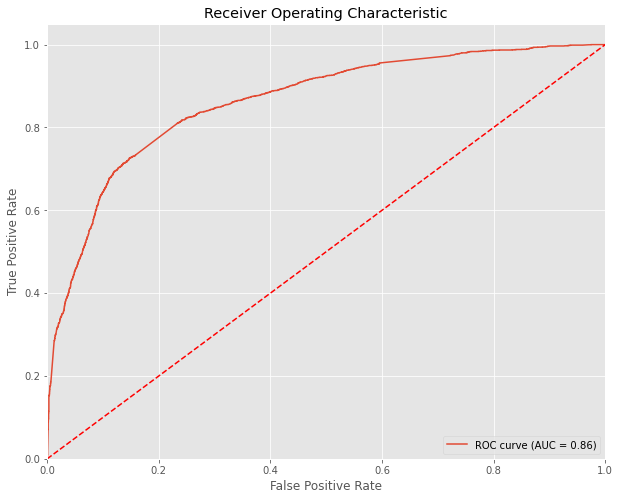

In [79]:
def plot_roc_curve(y_true, y_prob, title='Receiver Operating Characteristic'):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob, drop_intermediate=False)
    auc_score = roc_auc_score(y_true, y_prob)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

In [80]:
thresholds = np.linspace(0, 0.9, 10)  # Generate 10 evenly spaced threshold values from 0 to 0.9

# Iterate over each threshold value
for threshold in thresholds:
    column_name = 'Threshold_{}'.format(round(threshold, 1))  # Create a column name for each threshold
    
    # Convert predicted probabilities to binary predictions based on the threshold
    y_train_pred_final[column_name] = (y_train_pred_final['Converted_probability'] > threshold).astype(int)

y_train_pred_final.head()  # View the first 5 rows

,Converted,Converted_probability,ID,Threshold_0.0,Threshold_0.1,Threshold_0.2,Threshold_0.3,Threshold_0.4,Threshold_0.5,Threshold_0.6,Threshold_0.7,Threshold_0.8,Threshold_0.9
1871,0,0.333107,1871,1,1,1,1,0,0,0,0,0,0
6795,0,0.272324,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.216616,3516,1,1,1,0,0,0,0,0,0,0
8105,0,0.705671,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.333107,3934,1,1,1,1,0,0,0,0,0,0


**Accurary, Sensitivity, Specificity** 

In [81]:
# Creating an empty list to store the results
result_list = []

# Defining the range of probability cutoffs
cutoffs = np.arange(0.0, 1.0, 0.1)

# Looping over the cutoff values
for cutoff in cutoffs:
    # Creating a temporary DataFrame to hold the predicted values based on the cutoff
    temp_df = y_train_pred_final.copy()
    temp_df['predicted'] = np.where(temp_df['Converted_probability'] > cutoff, 1, 0)
    
    # Calculating the confusion matrix
    cm = confusion_matrix(temp_df['Converted'], temp_df['predicted'])
    
    # Extracting true negatives, false positives, false negatives, and true positives from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    
    # Calculating accuracy, sensitivity, and specificity
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    # Appending the results to the list
    result_list.append([cutoff, accuracy, sensitivity, specificity])

# Creating a DataFrame from the list of results
df_cutoffs = pd.DataFrame(result_list, columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

print(df_cutoffs)  # Print the DataFrame with the results


   Probability  Accuracy  Sensitivity  Specificity
0          0.0  0.381262     1.000000     0.000000
1          0.1  0.526129     0.982157     0.245127
2          0.2  0.699289     0.893350     0.579710
3          0.3  0.775201     0.824818     0.744628
4          0.4  0.806741     0.705191     0.869315
5          0.5  0.803494     0.650852     0.897551
6          0.6  0.787879     0.578670     0.916792
7          0.7  0.766698     0.483374     0.941279
8          0.8  0.740878     0.371452     0.968516
9          0.9  0.684292     0.181671     0.994003


**PLotting Accuracy, Sensitivity and Specificity**

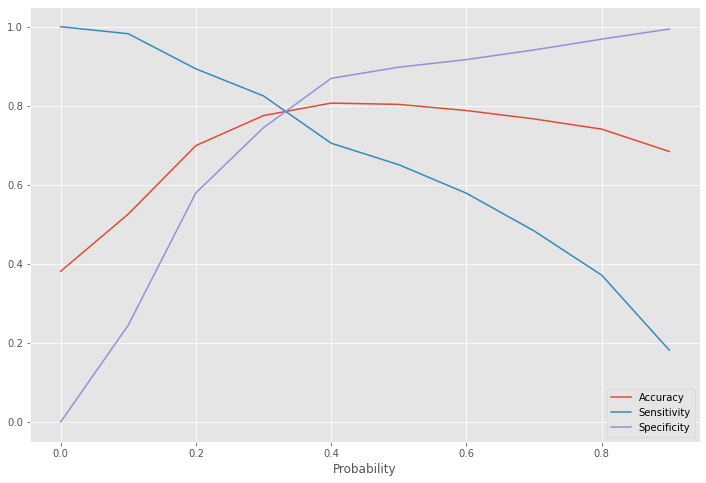

In [82]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'], figsize=(12,8))   # line plotting
plt.show()

In [83]:
# Create a new column 'Predicted' based on the probability cutoff of 0.3
y_train_pred_final['Predicted'] = np.where(y_train_pred_final['Converted_probability'] > 0.3, 1, 0)

# Print the updated DataFrame
y_train_pred_final.head()


,Converted,Converted_probability,ID,Threshold_0.0,Threshold_0.1,Threshold_0.2,Threshold_0.3,Threshold_0.4,Threshold_0.5,Threshold_0.6,Threshold_0.7,Threshold_0.8,Threshold_0.9,Predicted
1871,0,0.333107,1871,1,1,1,1,0,0,0,0,0,0,1
6795,0,0.272324,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.216616,3516,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.705671,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.333107,3934,1,1,1,1,0,0,0,0,0,0,1


In [84]:
# Creating confusion matrix to find all the metrics

confusion_pr_train=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr_train

array([[2980, 1022],
       [ 432, 2034]], dtype=int64)

In [85]:
#Sensitivity score
Sensitivity_train =round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)  

#specificity score
Specificity_train =round((confusion_pr_train[0,0]/(confusion_pr_train[0,0]+confusion_pr_train[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_train)  
print('Specificity:',Specificity_train) 

Sensitivity: 82.48
Specificity: 74.46


In [86]:
#  Pecision score
Precision_train = round((confusion_pr_train[1,1]/(confusion_pr_train[0,1]+confusion_pr_train[1,1])*100),2)

#  Recall score
Recall_train = round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)

#print both
print('Precision:',Precision_train) 
print('Recall:',Recall_train)     

Precision: 66.56
Recall: 82.48


In [87]:
Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100,2)
print('Train set Accuracy:',Accuracy_train)

Train set Accuracy: 77.52


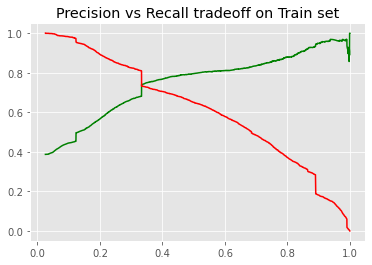

In [88]:
# importing precision recall curve from sklearn library for train set

from sklearn.metrics import precision_recall_curve, f1_score

# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

------
# Prediction on the test dataset
### Scaling the test dataset

In [89]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X_test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [90]:
# Predicting the test dataset with our final model

test_cols=X_train_3.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=logr3.predict(X_test_final)      # Predicting the final test set

In [91]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.360528,4269
2376,1,0.889902,2376
7766,1,0.773658,7766
9199,0,0.333107,9199
4359,1,0.889902,4359


In [92]:
# Creating a function to plot roc curve with auc score

def draw_roc(actual, probability):
    
    # Creating roc curve to get true positive rate, false positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( actual, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( actual, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(15,10))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis limit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

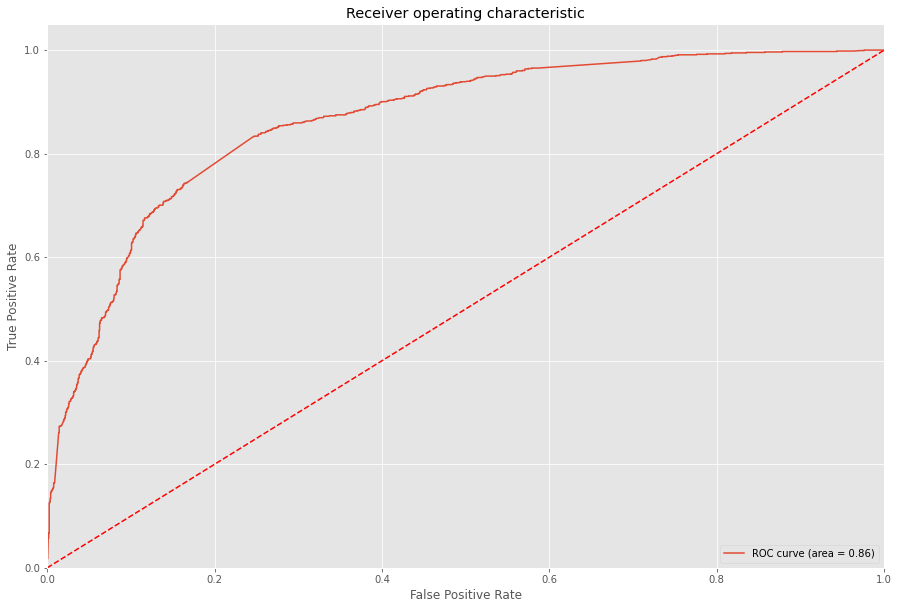

In [93]:
# Calling the roc curve function for plotting

draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

## Model Evaluation

In [94]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.360528,4269,1
2376,1,0.889902,2376,1
7766,1,0.773658,7766,1
9199,0,0.333107,9199,1
4359,1,0.889902,4359,1


In [95]:
# Creating confusion matrix to find precision and recall score

confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[1228,  449],
       [ 169,  926]], dtype=int64)

In [96]:
#Sensitivity score
Sensitivity_test =round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)  

#specificity score
Specificity_test =round((confusion_pr_test[0,0]/(confusion_pr_test[0,0]+confusion_pr_test[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test) 

Sensitivity: 84.57
Specificity: 73.23


In [97]:
#  Pecision score
Precision_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)

#  Recall score
Recall_test = round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)

#print both
print('Precision:',Precision_test) 
print('Recall:',Recall_test)     

Precision: 67.35
Recall: 84.57


In [98]:
# Checking test set accuracy

Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy:',Accuracy_test)

Test set Accuracy: 77.71


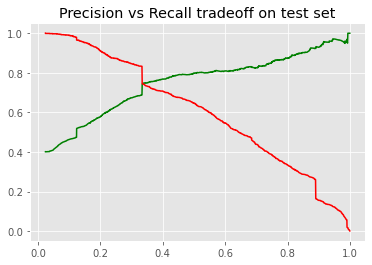

In [99]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)
plt.title('Precision vs Recall tradeoff on test set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [100]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  74.97975708502025


### Metrics Comparison between Train data set and Test data set

In [101]:
print('Train Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_train)   
print('Specificity:',Specificity_train)
print('Precision:',Precision_train) 
print('Recall:',Recall_train)
print('Accuracy:',Accuracy_train)
print()
print('Test Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test)
print('Precision:',Precision_test) 
print('Recall:',Recall_test)
print('Accuracy:',Accuracy_test)

Train Data Set metrics:

Sensitivity: 82.48
Specificity: 74.46
Precision: 66.56
Recall: 82.48
Accuracy: 77.52

Test Data Set metrics:

Sensitivity: 84.57
Specificity: 73.23
Precision: 67.35
Recall: 84.57
Accuracy: 77.71


### Assigning a Lead Score to the Predicted values based on Lead Number 

In [102]:
# Creating new columns for lead number and lead score
# lead score indicates higher score are hotter the leads and lower score are colder the leads.

y_test_pred_final['Lead Number']=leads.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))

y_test_pred_final.head(20)

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.360528,4269,1,0,36
2376,1,0.889902,2376,1,0,89
7766,1,0.773658,7766,1,0,77
9199,0,0.333107,9199,1,0,33
4359,1,0.889902,4359,1,0,89
9186,1,0.401649,9186,1,0,40
1631,1,0.605263,1631,1,0,61
8963,1,0.229116,8963,0,0,23
8007,0,0.092394,8007,0,0,9
5324,1,0.198619,5324,0,0,20
